In [1]:
import nibabel as nib
import gzip
import os
import glob
import numpy as np

DATA_PATH = "./data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG"

dir_list = os.listdir(DATA_PATH)
seg_files = []

In [20]:
for dir in dir_list:
    path = os.path.join(DATA_PATH, dir)
    file_list = glob.glob(path + "\\*.gz")
    seg = [file for file in file_list if file.endswith("seg.nii.gz")]
    if len(seg) != 0:
        seg_files.append(seg)

In [21]:
seg_files

['./data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_469_1\\Brats18_TCIA08_469_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_436_1\\Brats18_TCIA08_436_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_406_1\\Brats18_TCIA08_406_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_319_1\\Brats18_TCIA08_319_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_280_1\\Brats18_TCIA08_280_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_278_1\\Brats18_TCIA08_278_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_242_1\\Brats18_TCIA08_242_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_234_1\\Brats18_TCIA08_234_1_seg.nii.gz',
 './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_TCIA08_218_1\\Brats18_TCIA08_218_1_seg.n

In [22]:
def regroup_mask_array(mask_array):
    regrouped = mask_array
    regrouped[regrouped == 3] = 0
    regrouped[regrouped != 0] = 100
    return regrouped

In [23]:
import PIL.Image
from io import BytesIO
import IPython.display

def showarray(a, fmt = 'png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

Brats18_TCIA02_491_1_seg.nii.gz
brain: 50, z: 90


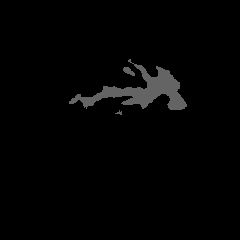

In [53]:
# for mask in seg_files[160:]:
brain_num = 50
z_idx = 90

mask = seg_files[brain_num]
mask_array = nib.load(mask).get_fdata()
mask_regrouped = regroup_mask_array(mask_array)


print(mask.split("\\")[-1])
print(f"brain: {brain_num}, z: {z_idx}")
showarray(mask_regrouped[..., z_idx])